![warshall algorithm](https://github.com/AnirudhChandupatla/BITS_MTech_DSE/blob/main/FloydsAlgo.png?raw=true)

+---+-----+-----+-----+-----+-----+
|   |  1  |  2  |  3  |  4  |  5  |
+---+-----+-----+-----+-----+-----+
| 1 | inf | inf |  6  |  3  | inf |
| 2 |  3  | inf | inf | inf | inf |
| 3 | inf | inf | inf |  2  | inf |
| 4 | inf |  1  |  1  | inf | inf |
| 5 | inf |  4  | inf |  2  | inf |
+---+-----+-----+-----+-----+-----+


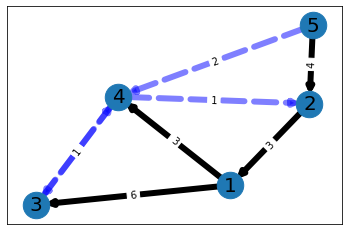

In [31]:
try:import networkx as nx 
except:
    !pip install networkx
    import networkx as nx
    
try:import matplotlib.pyplot as plt 
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt 
    
try:from prettytable import PrettyTable
except:
    !pip install prettytable
    from prettytable import PrettyTable
    
## 1st line is Number of nodes,
s = '''5
1 3 6
1 4 3
2 1 3
3 4 2
4 3 1
4 2 1
5 2 4
5 4 2'''
sl = s.split('\n')
N = int(sl[0])
adm = [[float('inf')]*N for i in range(N)]
nodes = sl[1:]
for r in nodes:
    u,v,w = map(int,r.split())
    adm[u-1][v-1] = w

x = PrettyTable()
x.field_names = [''] + [i+1 for i in range(len(adm))]
i=0
for r in adm:
    x.add_row([i+1]+r)
    i+=1
print(x)

G = nx.DiGraph() 
for i in range(len(adm)): 
    for j in range( len(adm) ): 
        if adm[i][j] != float('inf'): G.add_edge(i+1,j+1,weight=adm[i][j]) 

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 2]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 2]
pos = nx.spring_layout(G, seed=1)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()

In [29]:
from IPython.display import display, Math
superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
def FloydWarshall(adm):
    D = adm
    ll = len(adm)
    for k in range(ll):
        #R.append(adm)
        print('for k = {}'.format(k+1))
        for i in range(ll):
            print('for i = {}'.format(i+1))
            for j in range(ll):
                if( i == j):
                    D[i][j] = 0
                    continue
                prevDij = D[i][j]
                D[i][j] = min(D[i][j] , (D[i][k] + D[k][j]))
                display(Math("D^#{}@[{},{}] = min( D^#{}@[{},{}]  , (D^#{}@[{},{}]  +  D^#{}@[{},{}]) ) = "
                      .format(k+1,i+1,j+1,k,i+1,j+1,k,i+1,k+1,k,k+1,j+1).replace('#','{').replace('@','}')  +
                             'min( {} , ( {} + {} ) ) = '.format(prevDij,D[i][k],D[k][j]) + '{}'.format(D[i][j])))
                
            print('-'*10)
        x = PrettyTable()
        x.field_names = ['D{}'.format(k+1).translate(superscript)] + [i+1 for i in range(ll)]
        i=0
        for r in D:
            x.add_row([i+1]+r)
            i+=1
        print(x)
        print('-'*20)

In [32]:
FloydWarshall(adm)

for k = 1
for i = 1


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 2


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
+----+-----+-----+-----+---+-----+
| D¹ |  1  |  2  |  3  | 4 |  5  |
+----+-----+-----+-----+---+-----+
| 1  |  0  | inf |  6  | 3 | inf |
| 2  |  3  |  0  |  9  | 6 | inf |
| 3  | inf | inf |  0  | 2 | inf |
| 4  | inf |  1  |  1  | 0 | inf |
| 5  | inf |  4  | inf | 2 |  0  |
+----+-----+-----+-----+---+-----+
--------------------
for k = 2
for i = 1


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 2


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
+----+-----+-----+----+---+-----+
| D² |  1  |  2  | 3  | 4 |  5  |
+----+-----+-----+----+---+-----+
| 1  |  0  | inf | 6  | 3 | inf |
| 2  |  3  |  0  | 9  | 6 | inf |
| 3  | inf | inf | 0  | 2 | inf |
| 4  |  4  |  1  | 1  | 0 | inf |
| 5  |  7  |  4  | 13 | 2 |  0  |
+----+-----+-----+----+---+-----+
--------------------
for k = 3
for i = 1


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 2


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
+----+-----+-----+----+---+-----+
| D³ |  1  |  2  | 3  | 4 |  5  |
+----+-----+-----+----+---+-----+
| 1  |  0  | inf | 6  | 3 | inf |
| 2  |  3  |  0  | 9  | 6 | inf |
| 3  | inf | inf | 0  | 2 | inf |
| 4  |  4  |  1  | 1  | 0 | inf |
| 5  |  7  |  4  | 13 | 2 |  0  |
+----+-----+-----+----+---+-----+
--------------------
for k = 4
for i = 1


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 2


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
+----+---+---+---+---+-----+
| D⁴ | 1 | 2 | 3 | 4 |  5  |
+----+---+---+---+---+-----+
| 1  | 0 | 4 | 4 | 3 | inf |
| 2  | 3 | 0 | 7 | 6 | inf |
| 3  | 6 | 3 | 0 | 2 | inf |
| 4  | 4 | 1 | 1 | 0 | inf |
| 5  | 6 | 3 | 3 | 2 |  0  |
+----+---+---+---+---+-----+
--------------------
for k = 5
for i = 1


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 2


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
+----+---+---+---+---+-----+
| D⁵ | 1 | 2 | 3 | 4 |  5  |
+----+---+---+---+---+-----+
| 1  | 0 | 4 | 4 | 3 | inf |
| 2  | 3 | 0 | 7 | 6 | inf |
| 3  | 6 | 3 | 0 | 2 | inf |
| 4  | 4 | 1 | 1 | 0 | inf |
| 5  | 6 | 3 | 3 | 2 |  0  |
+----+---+---+---+---+-----+
--------------------


+---+-----+-----+-----+-----+
|   |  1  |  2  |  3  |  4  |
+---+-----+-----+-----+-----+
| 1 | inf | inf |  3  | inf |
| 2 |  2  | inf | inf | inf |
| 3 | inf |  7  | inf |  1  |
| 4 |  6  | inf | inf | inf |
+---+-----+-----+-----+-----+


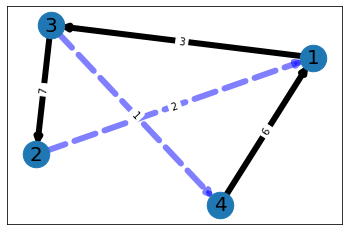

In [27]:
    
## 1st line is Number of nodes,
s = '''4
1 3 3
2 1 2
3 2 7
3 4 1
4 1 6'''
sl = s.split('\n')
N = int(sl[0])
adm = [[float('inf')]*N for i in range(N)]
nodes = sl[1:]
for r in nodes:
    u,v,w = map(int,r.split())
    adm[u-1][v-1] = w

x = PrettyTable()
x.field_names = [''] + [i+1 for i in range(len(adm))]
i=0
for r in adm:
    x.add_row([i+1]+r)
    i+=1
print(x)

G = nx.DiGraph() 
for i in range(len(adm)): 
    for j in range( len(adm) ): 
        if adm[i][j] != float('inf'): G.add_edge(i+1,j+1,weight=adm[i][j]) 

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 2]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 2]
pos = nx.spring_layout(G, seed=1)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()

In [30]:
FloydWarshall(adm)

for k = 1
for i = 1


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 2


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
+----+---+----+---+---+
| D¹ | 1 | 2  | 3 | 4 |
+----+---+----+---+---+
| 1  | 0 | 10 | 3 | 4 |
| 2  | 2 | 0  | 5 | 6 |
| 3  | 7 | 7  | 0 | 1 |
| 4  | 6 | 16 | 9 | 0 |
+----+---+----+---+---+
--------------------
for k = 2
for i = 1


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 2


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
+----+---+----+---+---+
| D² | 1 | 2  | 3 | 4 |
+----+---+----+---+---+
| 1  | 0 | 10 | 3 | 4 |
| 2  | 2 | 0  | 5 | 6 |
| 3  | 7 | 7  | 0 | 1 |
| 4  | 6 | 16 | 9 | 0 |
+----+---+----+---+---+
--------------------
for k = 3
for i = 1


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 2


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
+----+---+----+---+---+
| D³ | 1 | 2  | 3 | 4 |
+----+---+----+---+---+
| 1  | 0 | 10 | 3 | 4 |
| 2  | 2 | 0  | 5 | 6 |
| 3  | 7 | 7  | 0 | 1 |
| 4  | 6 | 16 | 9 | 0 |
+----+---+----+---+---+
--------------------
for k = 4
for i = 1


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 2


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
for i = 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------
+----+---+----+---+---+
| D⁴ | 1 | 2  | 3 | 4 |
+----+---+----+---+---+
| 1  | 0 | 10 | 3 | 4 |
| 2  | 2 | 0  | 5 | 6 |
| 3  | 7 | 7  | 0 | 1 |
| 4  | 6 | 16 | 9 | 0 |
+----+---+----+---+---+
--------------------
